In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('./data/Landslide_Kutupalong.csv')
df.dropna(axis=1, how='all', inplace=True)

# Drop rows with null values
df.dropna(axis=0, how='any', inplace=True)

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| Landslide_ID   | Camp_name   | Latitude   | Longitude   | Elevation (m)   | Date_of_movement   | General_slope (degree)   | Slided_slope (degree)   | Width (m)   | Length_prev (m)   | Length_after (m)   | Depth (m)   | Material      | Movement_type   | State      | Distribution         | Style      |
|:---------------|:------------|:-----------|:------------|:----------------|:-------------------|:-------------------------|:------------------------|:------------|:------------------|:-------------------|:------------|:--------------|:----------------|:-----------|:---------------------|:-----------|
| 1              | 20          | 21.1954    | 92.1378     | 13              | 2020               | 40                       | 60                      | 19          | 24                | 19                 | 13          | Soil or Earth | Slide           | Active     | Advancing, Enlarging | Successive |
| 2              | 20          | 21.1954    | 92.1379     | 3.8             | 2020      

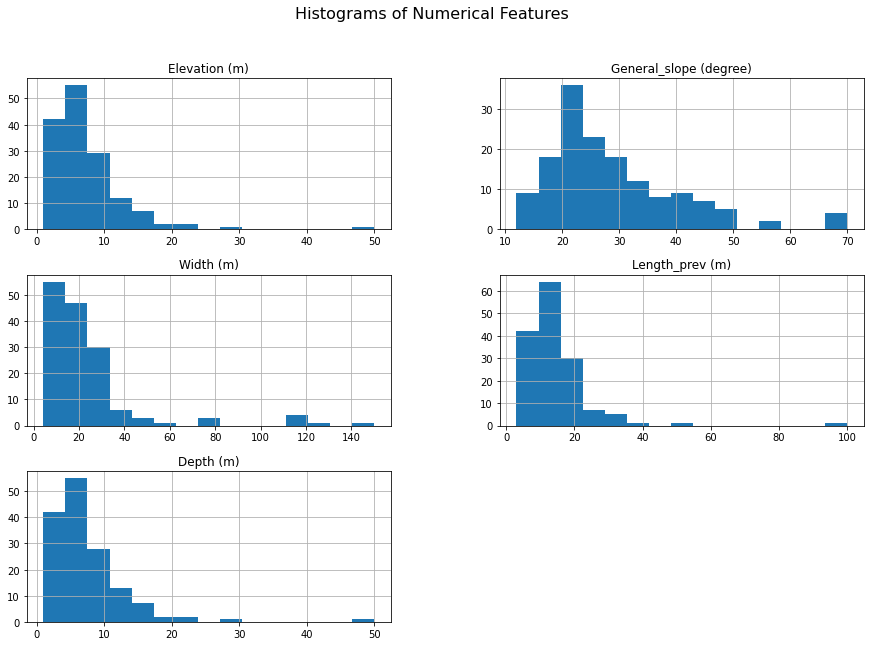

In [6]:
# Select numerical features for histograms
numerical_features = ['Elevation (m)', 'General_slope (degree)', 'Width (m)', 
                     'Length_prev (m)', 'Depth (m)']

# Create histograms
df[numerical_features].hist(figsize=(15, 10), bins=15)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

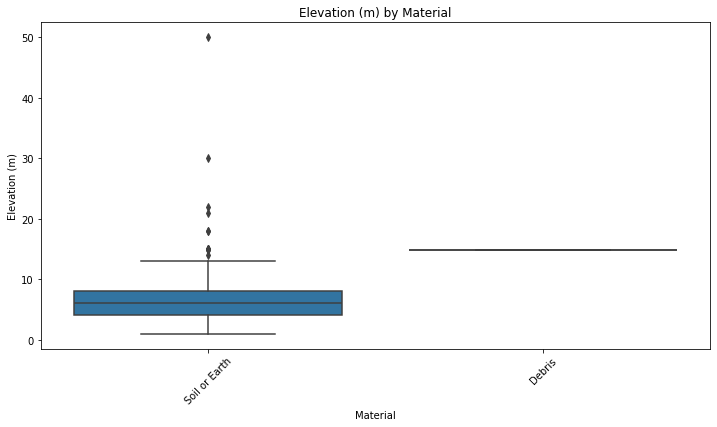

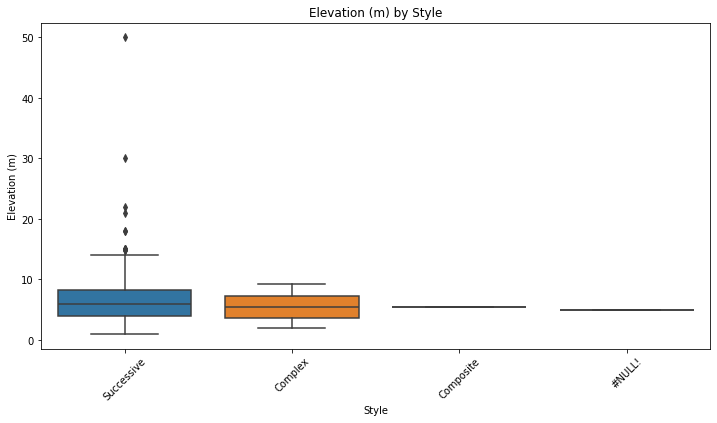

In [7]:
# Create box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Material', y='Elevation (m)', data=df)
plt.title('Elevation (m) by Material')
plt.xticks(rotation=45) 
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Style', y='Elevation (m)', data=df)
plt.title('Elevation (m) by Style')
plt.xticks(rotation=45) 
plt.show()

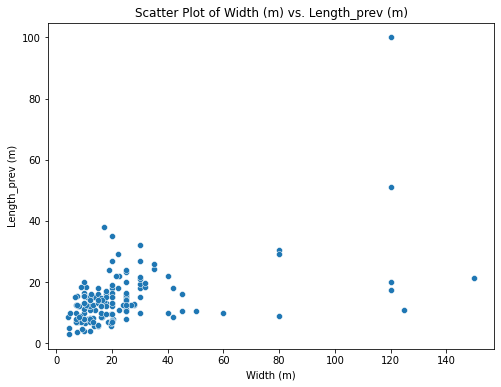

In [8]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Width (m)', y='Length_prev (m)', data=df)
plt.title('Scatter Plot of Width (m) vs. Length_prev (m)')
plt.show()

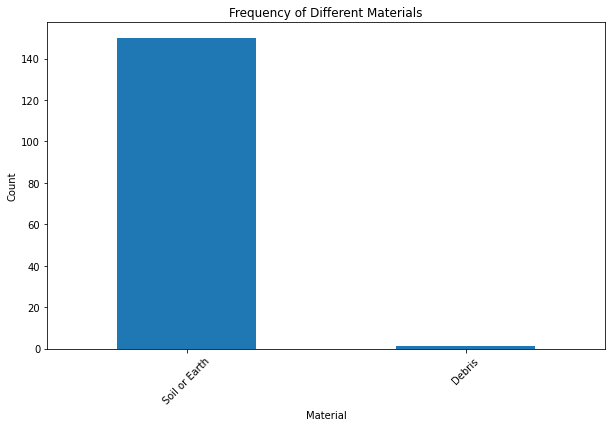

In [10]:
# Create bar chart for 'Material'
plt.figure(figsize=(10, 6))
df['Material'].value_counts().plot(kind='bar')
plt.title('Frequency of Different Materials')
plt.xlabel('Material')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

In [ ]:
#script to clean data

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('./data/cox_landslide_combined.csv')

# Remove columns where all values are null
df.dropna(axis=1, how='all', inplace=True)

# Rename the columns
column_mapping = {
    'Landslide_': 'Landslide_ID',
    'Camp_name': 'Camp_name',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    'Elevation': 'Elevation (m)',
    'Date_of_mo': 'Date_of_movement',
    'General_sl': 'General_slope (degree)',
    'Slided_slo': 'Slided_slope (degree)',
    'Width (m)': 'Width (m)',
    'Length_pre': 'Length_prev (m)',
    'Length_aft': 'Length_after (m)',
    'Depth (m)': 'Depth (m)',
    'Material': 'Material',
    'Movement_t': 'Movement_type',
    'State': 'State',
    'Distributi': 'Distribution',
    'Style': 'Style',
    'accumulati': 'Flow_accumulation_10yr_multiplied_log',
    'accumula_1': 'Flow_accumulation_20yr_multiplied_log',
    'accumula_2': 'Flow_accumulation_50yr_multiplied_log',
    'slope_clas': 'Slope_classification',
    'flow_direc': 'Flow_direction',
    '10yr_runof': 'Runoff_10yr',
    '20yr_runof': 'Runoff_20yr',
    '50yr_runof': 'Runoff_50yr',
    'fill_sinks': 'Fill_sinks',
    'basins1': 'Basins'
}
df = df.rename(columns=column_mapping)

# Export the DataFrame to a new CSV file
df.to_csv('./data/cox_landslide_renamed.csv', index=False)

# Create the 'out' folder if it doesn't exist
if not os.path.exists('out'):
    os.makedirs('out')

# Write the remaining header names to a text file
with open('out/remaining_headers_renamed.txt', 'w') as f:
    for col in df.columns:
        f.write(col + '\n')

# Print the first 5 rows of the renamed DataFrame
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types of the renamed DataFrame
print(df.info())